In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px 
font_used = 'Gill Sans'

#Andale Mono Gill Sans

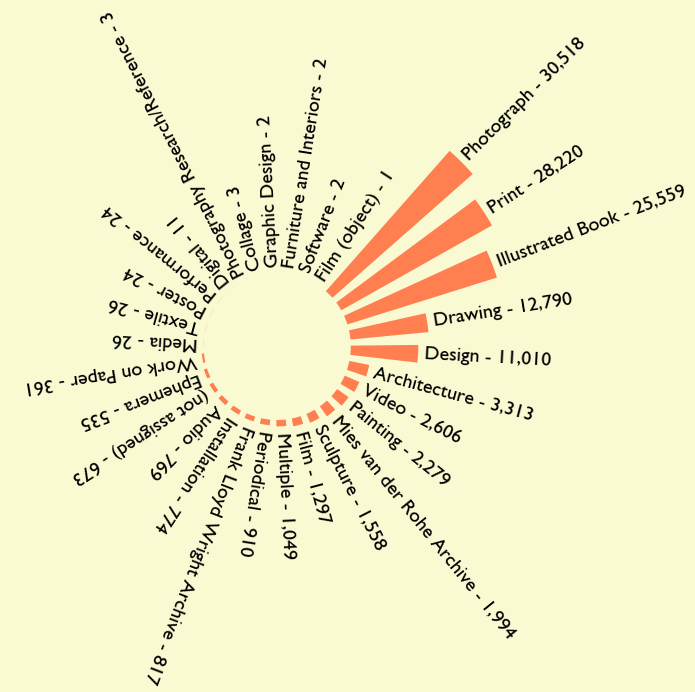

In [12]:
df = pd.read_csv("classifications.csv")
df['Value'] = df.apply(lambda x: "{:,}".format(x['count']), axis=1)
df['NameCount'] = df['Classification'] + ' - ' + df['Value'].astype(str)
df = df.sort_values(by="count",ascending=False)

lObjectsALLcnts = df['count']
lObjectsALLlbls = df['NameCount']
iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.pi/4 - np.arange(0,2*np.pi,2*np.pi/iN)
width = (2*np.pi)/iN *0.6
bottom = 12000

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=bottom, color="Coral")
fig.set_facecolor('LightGoldenRodYellow')
plt.axis('off')

#plt.rcParams['font.family'] = font_used
rotations = np.rad2deg(theta)
for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    lab = ax.text(x,bottom+bar.get_height() + 1000 , label, fontsize=20, linespacing=2,
            weight='ultralight',fontname=font_used,
             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)   
plt.show()

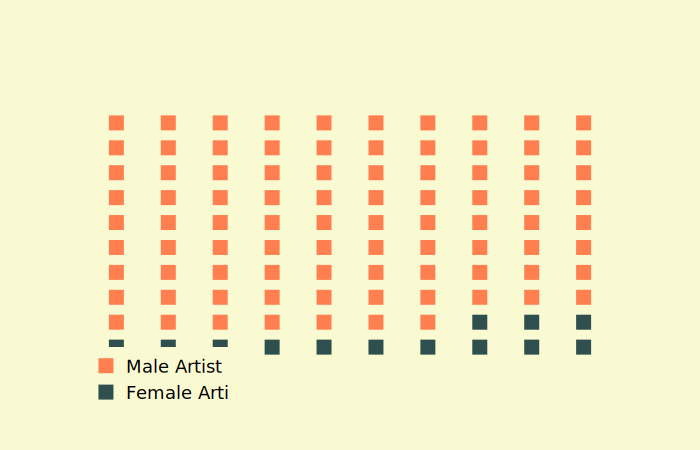

In [3]:
Xlim = 10
Ylim = 5
Xpos = 0
Ypos = 12 ##change to zero for upwards
series = []
males = 1982
females = 288
total_squares = 10*10
percents = {'Male Artist' : '87%', 'Female Artist' : '13%'}
male_s = round(males/(males+females)*total_squares)
female_s = total_squares - male_s

ds = pd.Series({'Male Artist' : male_s, 'Female Artist' : female_s})
males = ds['Male Artist']
colors = {'Male Artist' : 'Coral', 'Female Artist' : 'DarkSlateGray'}
title = ""
for name, count in ds.iteritems():
    x = []
    y = []
    for j in range(0, count):
        if Xpos == Xlim:
            Xpos = 0
            Ypos -= 1 ##change to positive for upwards
        x.append(Xpos)
        y.append(Ypos)
        Xpos += 1
    series.append(go.Scatter(x=x, y=y, mode='markers', marker={'symbol': 'square', 'size': 15, 'color':colors[name] }, name=f'{name}')) # ({percents[name]})'))


fig = go.Figure(dict(data=series, layout=go.Layout(
    title={'text': title, 'x': 0.5, 'xanchor': 'center'},
    paper_bgcolor='LightGoldenRodYellow',
    plot_bgcolor='LightGoldenRodYellow',
    xaxis=dict(showgrid=False,zeroline= False, showline=False, visible=False, showticklabels=False),
    yaxis=dict(showgrid=False,zeroline= False, showline=False, visible=False, showticklabels=False),
    font= {'color': 'Black', 'family':font_used,'size':18},
    legend=dict(x=0.011, y=-.15),
    width = 430, height = 550,
    margin= {'t':100}
)))
fig.show("svg")
fig.write_image("../../Google Drive/MoMA_extracts/painting_square_by_gender.pdf")

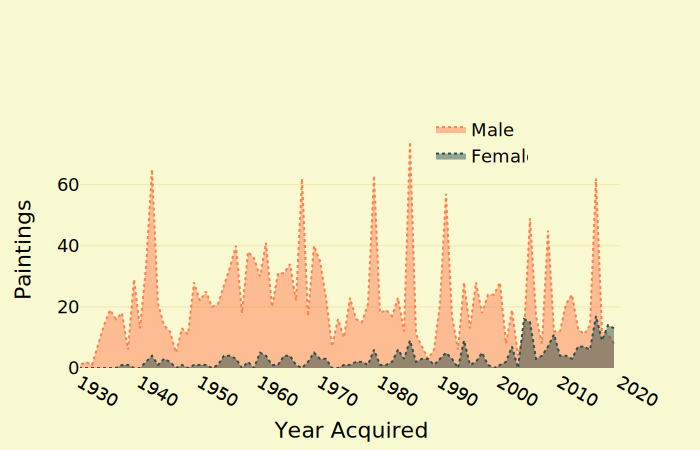

In [4]:
df = pd.read_csv('painting_obtained_year_gender.csv')
df_m = df[df['Gender']=='Male']
df_fm = df[df['Gender']=='Female']

traces = []
traces.append(
    go.Scatter(x=df_m['ObtainedYear'],y=df_m['count'], mode='lines', line = dict(
                            color='Coral',dash='dot',width=2
                        ), 
                        showlegend=True, name = "Male",fill='tozeroy'
                )
    )

traces.append(
    go.Scatter(x=df_fm['ObtainedYear'],y=df_fm['count'], mode='lines', line = dict(
                            color='DarkSlateGray',dash='dot',width=2
                        ), showlegend=True, name = "Female",fill='tozeroy'
                )
    )
layout = dict(
            title="", 
            yaxis_title= "Paintings", 
            xaxis_title= "Year Acquired",
            xaxis= { "fixedrange": True, 'nticks': 10,'gridcolor':'lightgrey',"range":[1930,2020],'zeroline':False, 'showgrid':False,'tickangle':30 },
            yaxis= {"fixedrange": True, 'gridcolor':'PaleGoldenRod','zeroline':False},
            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
            font= {'color': 'black', 'family':font_used,'size':18}, margin= {'b': 50, 't': 130}, 
                        legend= {'x':0.65,'y':1.08,},
            width=450,height=500,
)
painting_gender_chart = go.Figure(data=traces,
    layout=layout,
)
painting_gender_chart.show("svg")
painting_gender_chart.write_image("../../Google Drive/MoMA_extracts/painting_gender_year.pdf")


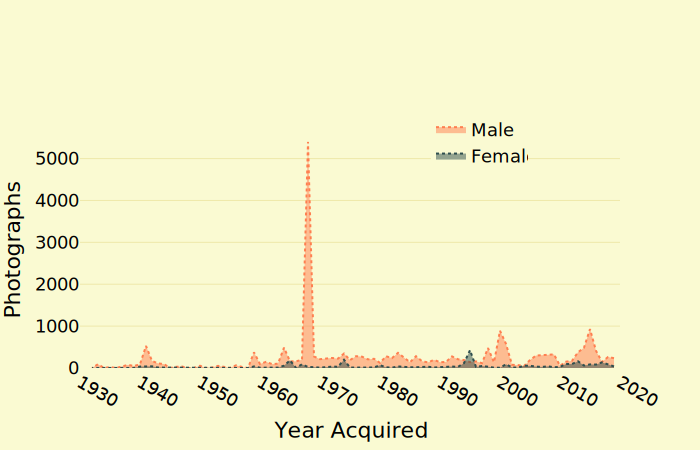

In [5]:
df = pd.read_csv('photograph_obtained_year_gender.csv')
df_m = df[df['Gender']=='Male']
df_fm = df[df['Gender']=='Female']

traces = []
traces.append(
    go.Scatter(x=df_m['ObtainedYear'],y=df_m['count'], mode='lines', line = dict(
                            color='Coral',dash='dot',width=2,
                        ), showlegend=True, name = "Male",fill='tozeroy'
                )
    )

traces.append(
    go.Scatter(x=df_fm['ObtainedYear'],y=df_fm['count'], mode='lines', line = dict(
                            color='DarkSlateGray',dash='dot',width=2
                        ), showlegend=True, name = "Female",fill='tozeroy'
                )
    )
layout = dict(
            title="", 
            yaxis_title= "Photographs", 
            xaxis_title= "Year Acquired",
            xaxis= { "fixedrange": True, 'nticks': 15,'gridcolor':'darkgrey',"range":[1930,2020],'zeroline':False, 'showgrid':False ,'tickangle':30 },
            yaxis= {"fixedrange": True, 'gridcolor':'PaleGoldenRod','zeroline':False},
            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
            font= {'color': 'black','family': font_used,'size':18}, margin= {'b': 50, 't': 130}, 
            legend= {'x':0.65,'y':1.08,},
            width=450,height=500,
)
photo_gender_chart = go.Figure(data=traces,
    layout=layout,
)
photo_gender_chart.show("svg")
photo_gender_chart.write_image("../../Google Drive/MoMA_extracts/photograph_gender_year.pdf")

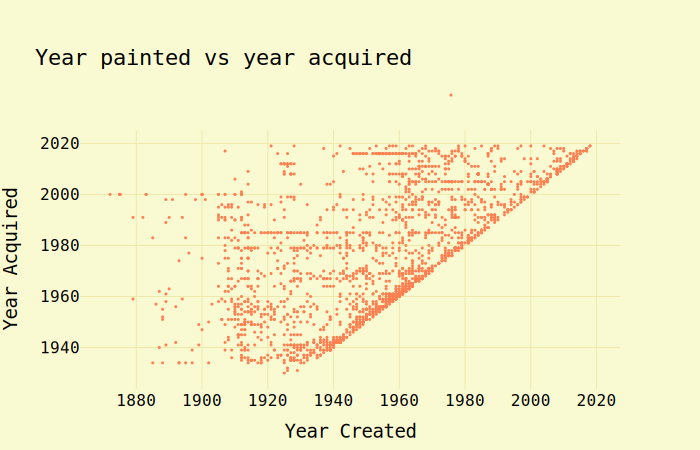

In [6]:
df = pd.read_csv('painting_created_obtained.csv')

traces = []
traces.append(
    go.Scatter(x=df['CreatedYear'],y=df['ObtainedYear'], mode='markers', marker = dict(
                            color='Coral', size = 3
                        ), showlegend=True, name = "",  hovertemplate = 
                        '%{text}', text = df['Title'], 
                )
    )

layout = dict(
            title='Year painted vs year acquired', 
            yaxis_title= "Year Acquired", 
            xaxis_title= "Year Created",
            xaxis= { "fixedrange": True, 'nticks': 10,'gridcolor':'PaleGoldenRod','zeroline':False, 'showgrid':True },
            yaxis= {"fixedrange": True, 'gridcolor':'PaleGoldenRod','zeroline':False},
            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
            font= {'color': 'black','family':'Andale Mono','size':16}, margin= {'b': 50, 't': 130}, 
            legend= {'x':0.65,'y':1.2,},
            width=700,height=500,
)
modern_chart = go.Figure(data=traces,
    layout=layout,
)
modern_chart.show("svg")

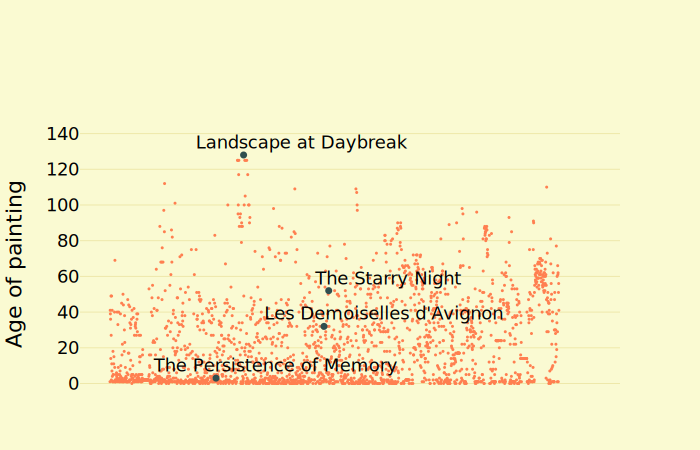

In [7]:
df = pd.read_csv('painting_created_obtained.csv')
df['YearsPassed'] = df['ObtainedYear'] - df['CreatedYear']

df_big = df[df['Title'].isin(["The Starry Night","Les Demoiselles d'Avignon","Landscape at Daybreak","The Persistence of Memory"])]

count = df.shape[0]
x = list(range(0,count))
traces = []
traces.append(
    go.Scatter(x=x,y=df['YearsPassed'], mode='markers', marker = dict(
                            color='Coral', size = 3
                        ), showlegend=False, name = "mm",  hovertemplate = 
                        '%{text}', text = df['Title'], 
                )
    )

traces.append(
    go.Scatter(x=df_big.index,y=df_big['YearsPassed'], mode='markers', marker = dict(
                            color='DarkSlateGray', size = 7

                        ), showlegend=False, name = "mm",  hovertemplate = 
                        '%{text}', text = df_big['Title'], 
                )
    )
annotations = [
    dict(
        x= x+300, 
        y= y+0,
        text=n if n in ["The Starry Night","Les Demoiselles d'Avignon","Landscape at Daybreak","The Persistence of Memory"] else "", 
        font = dict(size=18, color='black'),
        showarrow=False if n in ["The Starry Night","Les Demoiselles d'Avignon"] else False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for n, x, y in zip(df['Title'], x, df['YearsPassed'])
]

layout = dict(
            title="", 
            yaxis_title= "Age of painting", 
            xaxis_title= "Year painted",
            xaxis= { "fixedrange": True, 'nticks': 10,'gridcolor':'PaleGoldenRod','zeroline':False, 'showgrid':False,'visible':False },
            yaxis= {"fixedrange": True, 'gridcolor':'PaleGoldenRod','zeroline':False},
            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
            font= {'color': 'black','family':font_used,'size':18}, margin= {'b': 50, 't': 130}, 
            legend= {'x':0.65,'y':1.2,},
            annotations = annotations,
                        width=550,
            height = 600,
)
modern_chart_diff = go.Figure(data=traces,
    layout=layout,
)
modern_chart_diff.show("svg")
modern_chart_diff.write_image("../../Google Drive/MoMA_extracts/created_year_vs_acquired_2_blank.pdf")

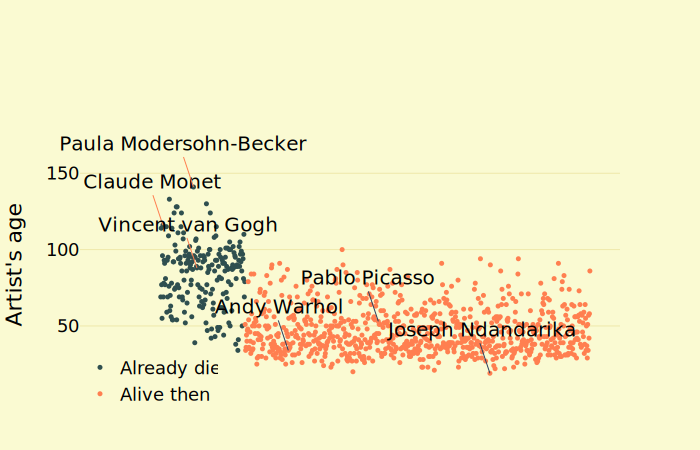

In [8]:
df = pd.read_csv('ArtistsFirst.csv')
big_names = ["Vincent van Gogh","Claude Monet","Pablo Picasso","Andy Warhol",
'Paula Modersohn-Becker','Joseph Ndandarika']
#df = df.sort_values(by="AgeFirstObtained",ascending=False)
df_died = df[df['AliveToSee']==False]
df_alive = df[df['AliveToSee']==True]

df_big_died = df[(df['Artist'].isin(big_names)) & (df['AliveToSee'] == False)]
df_big_alive = df[(df['Artist'].isin(big_names)) & (df['AliveToSee'] == True)]

count = df.shape[0]
x_died = list(range(0,df_alive.shape[0]))
x_alive = list(range(df_died.shape[0],df_alive.shape[0]+df_died.shape[0]))
traces = []

traces.append(
    go.Scatter(x=x_died,y=df_died['AgeFirstObtained'], mode='markers', marker = dict(
                            color='DarkSlateGray', size = 5
                        ), showlegend=True, name = "Already died",  hovertemplate = 
                        '%{text}', text = df_died['Artist'], 
                )
    )

traces.append(
    go.Scatter(x=x_alive,y=df_alive['AgeFirstObtained'], mode='markers', marker = dict(
                            color='Coral', size = 5,
                        ), showlegend=True, name = "Alive then",  hovertemplate = 
                        '%{text}', text = df_alive['Artist'], 
                )
    )



annotations = [
    dict(
        x= x, 
        y= y,
        text=n if n in big_names else "", 
        font = {'color':'Black','size':20},
        showarrow=True if n in big_names else False,
        arrowcolor='Coral',
        arrowsize = 4,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for n, x, y in zip(df_died['Artist'], x_died, df_died['AgeFirstObtained'])
]

annotations += [
    dict(
        x= x, 
        y= y,
        text=n if n in big_names else "", 
        font = {'color':'black','size':20,},
        showarrow=True if n in big_names else False,
        
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for n, x, y in zip(df_alive['Artist'], x_alive, df_alive['AgeFirstObtained'])]

layout = dict(
            title="", 
            yaxis_title= "Artist's age", 
            xaxis_title= "",
            xaxis= { "fixedrange": False, 'nticks': 10,'gridcolor':'darkgrey','zeroline':False, 'showgrid':False, 'visible':False },
            yaxis= {"fixedrange": False, 'gridcolor':'PaleGoldenRod','zeroline':False},
            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
            font= {'color': 'black','family':font_used,'size':18}, margin= {'b': 50, 't': 130}, 
            legend= {'x':0.0,'y':-.045},
            annotations = annotations,
            width=550,
            height = 600,
)
dead_chart = go.Figure(data=traces,
    layout=layout,
)
dead_chart.show("svg")
dead_chart.write_image("../../Google Drive/MoMA_extracts/artist_age_first_acquired_blank.pdf")


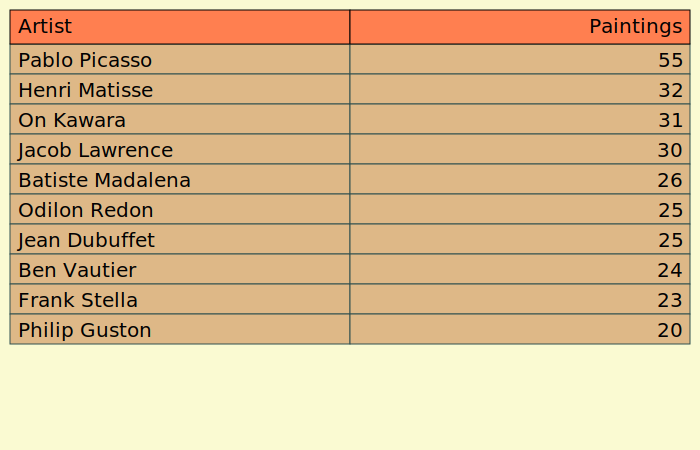

In [9]:
df = pd.read_csv('painting_artist.csv')
df = df[0:10]
fig = go.Figure(data=[go.Table(
    header=dict(values=['Artist', 'Paintings'],
                line_color='black',
                font={'color':'black'},
                fill_color='coral',
                align=['left','right'],
                height=34),
    cells=dict(values=[df['Artist'], # 1st column
                       df['count']], # 2nd column
               line_color='darkslategray',
               fill_color='burlywood',
               align=['left','right'],
               height=30))
])

fig.update_layout(width=400, height=400, margin={'t':10,'b':0,'l':10,'r':10},
                font= {'color': 'black','family':font_used,'size':20},
                            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
)
fig.show("svg")
fig.write_image("../../Google Drive/MoMA_extracts/table1.pdf")


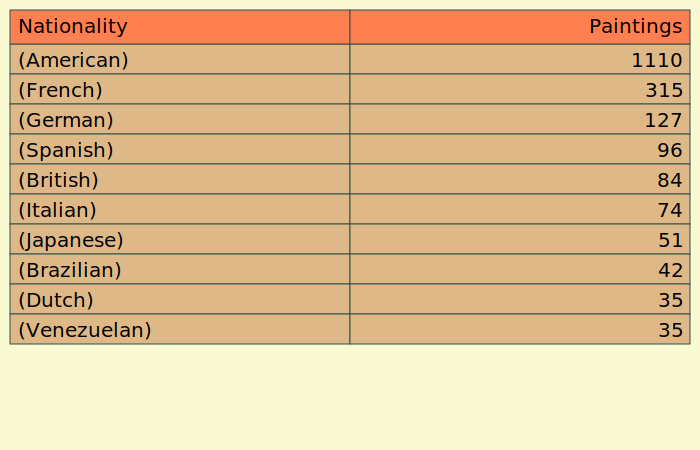

In [17]:
df = pd.read_csv('nationality.csv')
df = df[0:10]
fig = go.Figure(data=[go.Table(
    header=dict(values=['Nationality', 'Paintings'],
                line_color='darkslategray',
                fill_color='coral',
                align=['left','right'],
                height=34),
    cells=dict(values=[df['Nationality'], # 1st column
                       df['count']], # 2nd column
               line_color='darkslategray',
               fill_color='burlywood',
               align=['left','right'],
               height=30))
])

fig.update_layout(width=400, height=350, margin={'t':10,'b':0,'l':10,'r':10},
                font= {'color': 'black','family':font_used,'size':20},
                            paper_bgcolor='LightGoldenRodYellow',
            plot_bgcolor='LightGoldenRodYellow', 
)
fig.show("svg")
fig.write_image("../../Google Drive/MoMA_extracts/table2.pdf")
